In [134]:
# インポート
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
import seaborn as sns

In [129]:
df = pd.read_csv('./4_1_kagle_dataset/1_kc_house_data/1_data/kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'])
#[date]の一番低い日付からの相対的な日数
#df['date'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

In [135]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [139]:
# 相関の確認
df.corr().style.format('{:.2f}').background_gradient()
#sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


priseと相関の高い値(0.5以上) <br />
bathrooms
sqft_living
grade
sqft_above
sqft_living15

In [119]:
df_data2 = df_data.drop(["id","date","zipcode"], axis=1)
df1 = df_data2.iloc[:,:9]
#display(df1.head())
df2 = df_data2.iloc[:,[0]+list(range(9,18))]
#display(df2.head())

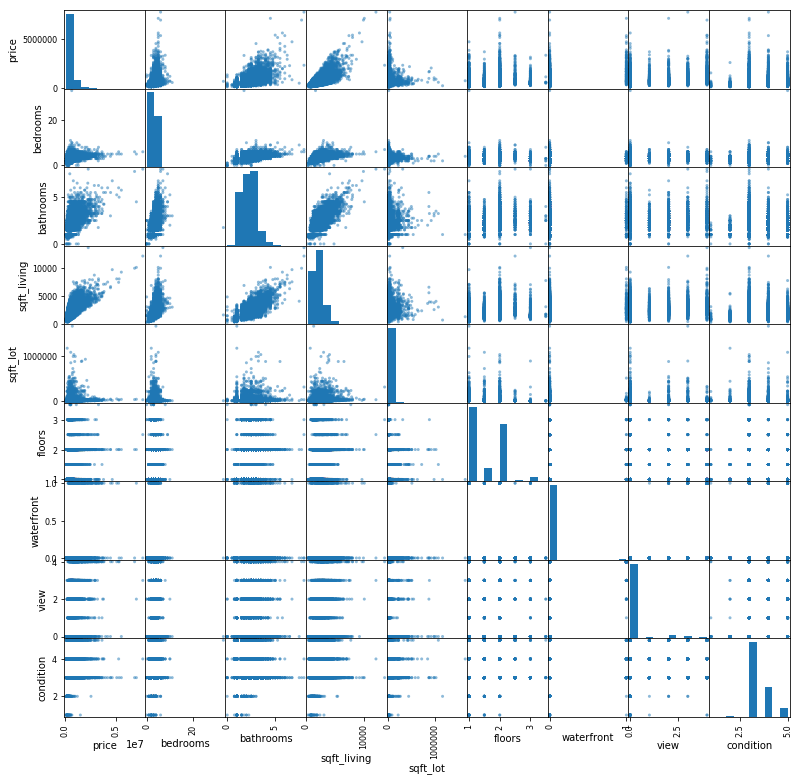

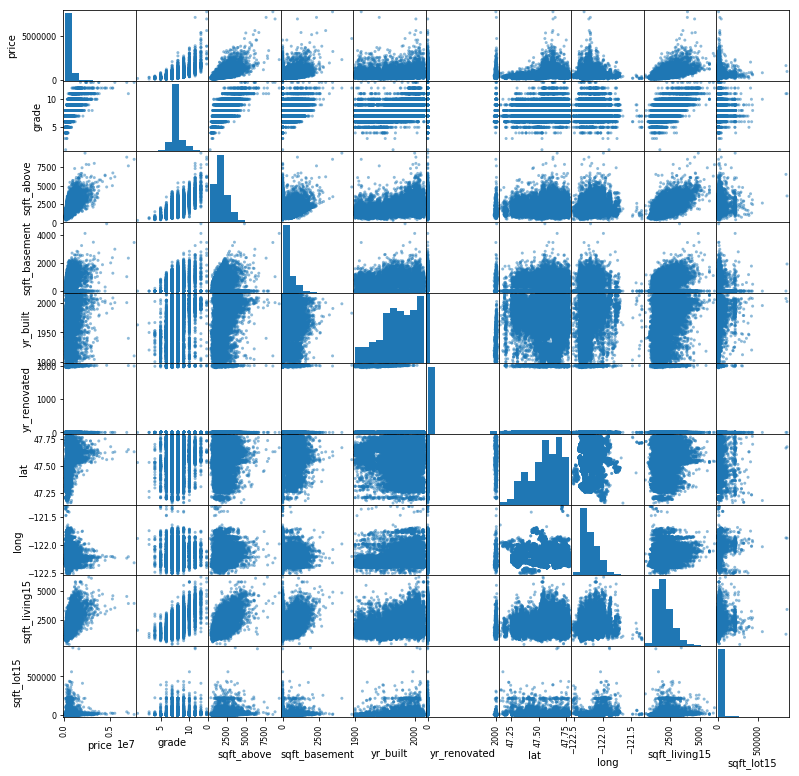

In [108]:
# 散布図行列
pd.plotting.scatter_matrix(df1,figsize=(13,13))
plt.show()
pd.plotting.scatter_matrix(df2,figsize=(13,13))
plt.show()

In [132]:
#VIFの計算
from sklearn.linear_model import LinearRegression
#df = df.drop('date',axis=1)
for cname in df.columns:
    y = df[cname]
    X = df.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    if rsquared == 1:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

sqft_living Index(['sqft_above', 'sqft_basement'], dtype='object')
sqft_above Index(['sqft_living', 'sqft_basement'], dtype='object')
sqft_basement Index(['sqft_living', 'sqft_above'], dtype='object')


In [ ]:
X = df.drop(['price','condition'],axis=1)
y = df['price']
regr = LinearRegression(fit_intercept=True).fit(X,y)

In [131]:
# トレインテスト分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

MSE=45375380378.495
RMSE=213014.977
MAE=128688.487
